In [ ]:
# Don
# Dr. Ofori
# DSC - 510
# 1 Nov 2023
# YouTube Link: https://youtu.be/xpy7ZNiZyuA
# Kaggle df link: https://www.kaggle.com/datasets/samybaladram/iris-dataset-extended?select=iris_extended.csv

In [2]:
import pandas as pd

In [15]:
df = pd.read_csv('/users/don/Downloads/iris_extended.csv')

In [16]:
print(df.columns)

Index(['species', 'elevation', 'soil_type', 'sepal_length', 'sepal_width',
       'petal_length', 'petal_width', 'sepal_area', 'petal_area',
       'sepal_aspect_ratio', 'petal_aspect_ratio',
       'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio',
       'sepal_petal_length_diff', 'sepal_petal_width_diff',
       'petal_curvature_mm', 'petal_texture_trichomes_per_mm2',
       'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios'],
      dtype='object')


In [17]:
# List of columns to drop
columns_to_drop = [
    'sepal_aspect_ratio', 'petal_aspect_ratio',
    'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio',
    'sepal_petal_length_diff', 'sepal_petal_width_diff',
    'petal_curvature_mm', 'petal_texture_trichomes_per_mm2',
    'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios'
]

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

#print(data.columns)
print(df.head())


  species  elevation soil_type  sepal_length  sepal_width  petal_length  \
0  setosa      161.8     sandy          5.16         3.41          1.64   
1  setosa      291.4      clay          5.48         4.05          1.53   
2  setosa      144.3     sandy          5.10         2.80          1.47   
3  setosa      114.6      clay          4.64         3.44          1.53   
4  setosa      110.9     loamy          4.85         2.87          1.23   

   petal_width  sepal_area  petal_area  
0         0.26     17.5956      0.4264  
1         0.37     22.1940      0.5661  
2         0.38     14.2800      0.5586  
3         0.17     15.9616      0.2601  
4         0.26     13.9195      0.3198  


In [18]:
# Check for missing values
missing_values = df.isnull().any()

# Print the missing values info
print(missing_values)


species         False
elevation       False
soil_type       False
sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
sepal_area      False
petal_area      False
dtype: bool


In [23]:
# Task 1 - ANOVA
# Research Question: Is there a significant difference in the mean petal length across different iris species?

# H0 (Null Hypothesis): There is no difference in the mean petal lengths among the species. 
# H0: μ1 = μ2 = μ3

# Ha (Alternative Hypothesis): At least one species has a different mean petal length from the others.

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model using 'petal_length' as the dependent variable
# and the categorical variable 'species' as the independent variable
anova_model = ols('petal_length ~ C(species)', data=df).fit()

# Perform the ANOVA and print the table
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


                 sum_sq      df            F  PR(>F)
C(species)  3460.243389     2.0  7479.166995     0.0
Residual     276.896568  1197.0          NaN     NaN


In [ ]:
# Interpret
# Since the p-value is less than 0.05, we reject the null hypothesis and accept the alternative hypothesis,
# concluding that not all species of iris have the same average petal length

ShapiroResult(statistic=0.983957827091217, pvalue=3.0503091719147335e-10)


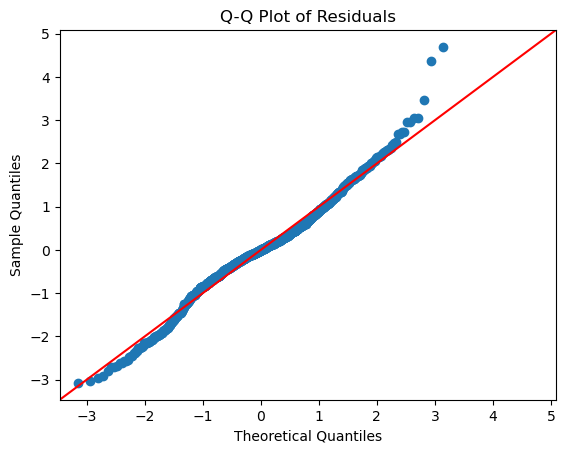

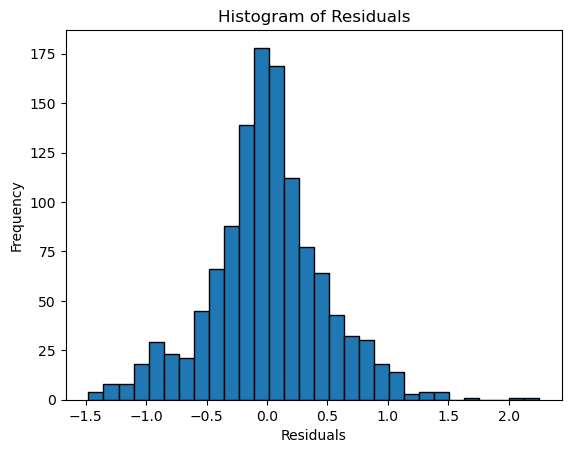

LeveneResult(statistic=166.6461514237848, pvalue=1.4186469177188176e-64)


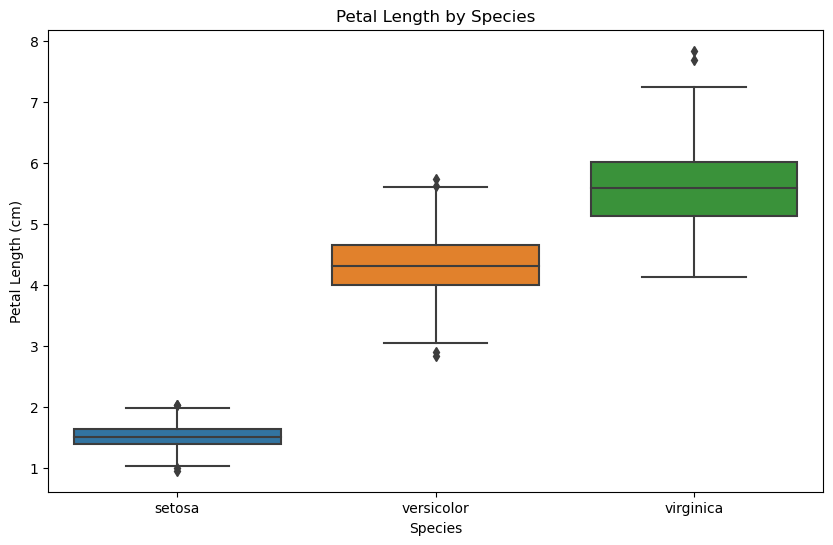

species
setosa        400
versicolor    400
virginica     400
dtype: int64

In [40]:
# Task 3 Part 1 - ANOVA Assumptions

#Independence: Observations must be independent within and across groups.
#We assume independence of observations, as this is an experimental design where each data point is 
#collected without influence from others

#Random Sampling: Data represents random samples from populations.
#We assume that the data are drawn from a random sample

#Normality: Residuals should be approximately normal.
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

residuals = anova_model.resid

# Shapiro-Wilk test on residuals
shapiro_results = stats.shapiro(residuals)
print(shapiro_results)

# Generate Q-Q plot of residuals
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()

#hist of residuals
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#density plot of resid
#sns.kdeplot(residuals, bw_adjust=0.5)
#plt.title('Density Plot of Residuals')
#plt.xlabel('Residuals')
#plt.show()

_='''
while assessing the normality assumption for ANOVA, our visual analysis showed a pronounced peak in the 
distribution of residuals, suggesting a deviation from the expected bell curve of a normal distribution. 
This visual is supported by the results of the Shapiro-Wilk test, which, despite a statistic near 1, 
yielded a p-value far below the standard threshold for significance. This p-value indicates a significant 
deviation from normality.
'''

#Scale: Data should be at the interval or ratio level of measurement
#Petal lengths are ratio-scale measurements, which satisfy this assumption

# Homogeneity of Variances: Variances should be equal across groups.
# Levene's test for equal variances
# Given the very small p-value, there is very strong evidence to suggest that the variances of petal length 
# are not equal across the three iris species

levene_test = stats.levene(df[df['species'] == 'setosa']['petal_length'], 
             df[df['species'] == 'versicolor']['petal_length'], 
             df[df['species'] == 'virginica']['petal_length'])

print(levene_test)


#Absence of Outliers: Outliers can skew results and should be addressed.
# Outliers are few, but present (do not appear extreme)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal_length', data=df)

#title and labels of the plot
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show the plot
plt.show()

#Interactions:

#Equal Group Sizes: not required but ideally, groups should have roughly the same number of observations 
#to enhance test reliability
#Assumption has been met there are 400 of each species in the sample

df.groupby('species').size()



In [25]:
# Task 2 - Linear Model

import statsmodels.api as sm

# Define the dependent variable
Y = df['petal_length']

# Define the independent variables
X = df[['sepal_length', 'sepal_width', 'petal_width', 'sepal_area', 'petal_area', 'elevation']]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     1914.
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:09:18   Log-Likelihood:                -966.25
No. Observations:                1200   AIC:                             1946.
Df Residuals:                    1193   BIC:                             1982.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8810      0.681      1.293   

In [ ]:
# Interpret: 
# This regression analysis reveals that the model is highly effective in explaining the variation in petal length,
# with an R-squared value of 0.906. This indicates that 90.6% of the variance in petal length is accounted for by the
# independent variables included in the model. Key predictors such as sepal length and petal area are statistically 
# significant, demonstrating strong relationships with petal length. 

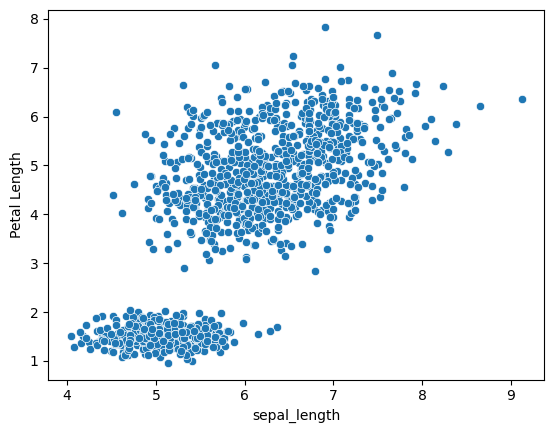

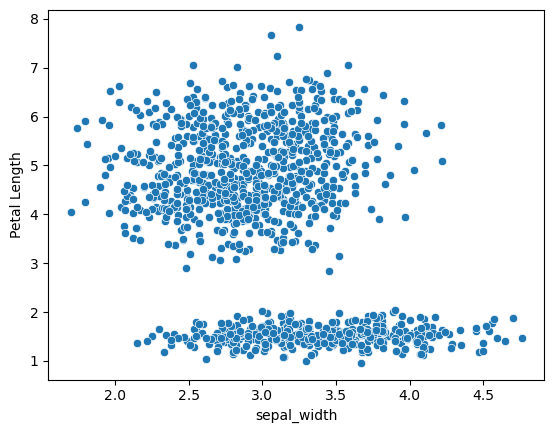

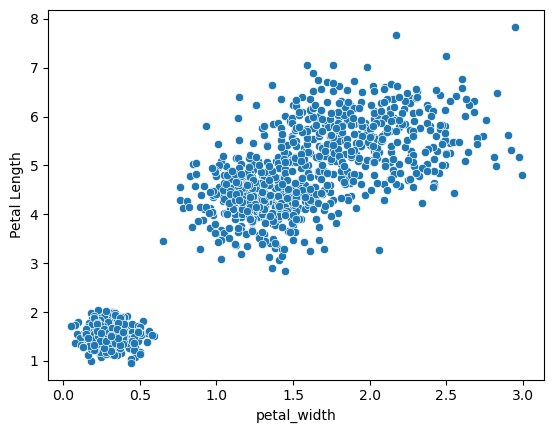

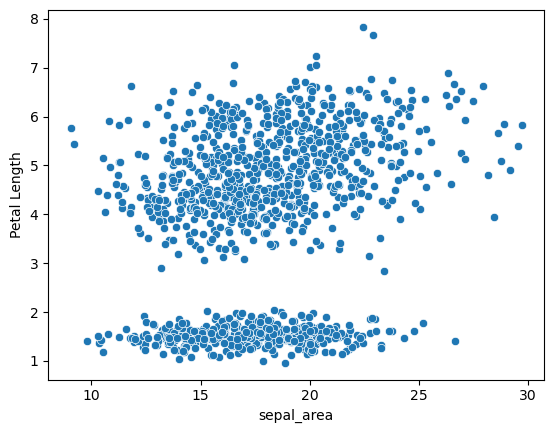

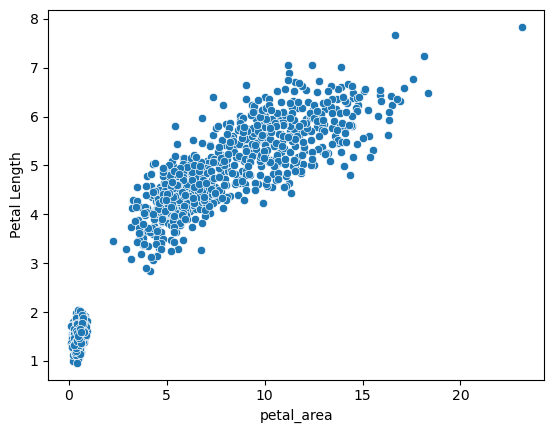

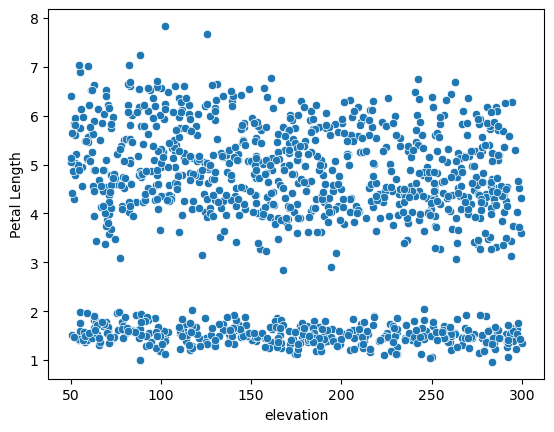

Durbin-Watson test statistic: 1.4865028594684766


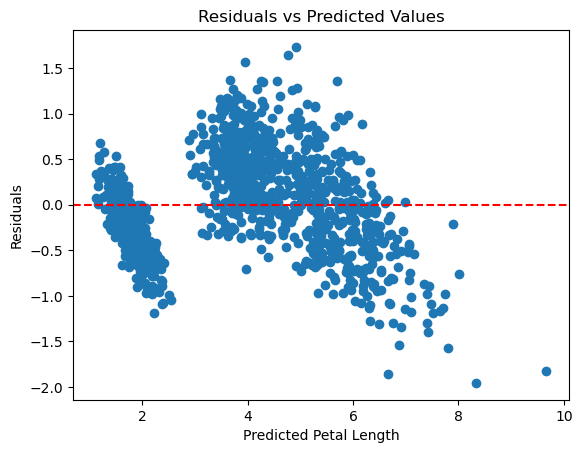

Shapiro-Wilk test results: ShapiroResult(statistic=0.9973254799842834, pvalue=0.04283154755830765)


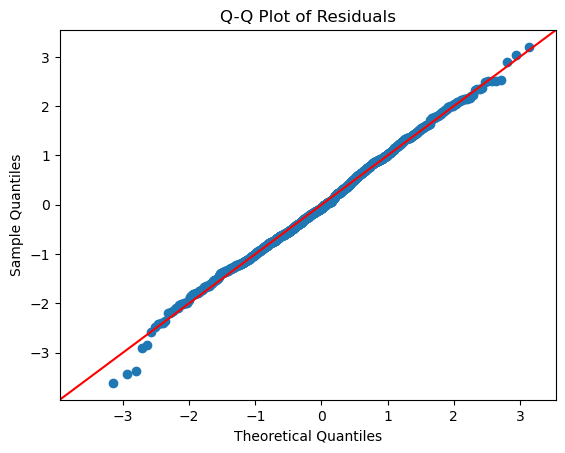

        feature         VIF
0  sepal_length   51.952916
1   sepal_width  100.285073
2   petal_width   72.893564
3    sepal_area  164.413232
4    petal_area   49.953365
5     elevation    7.520002


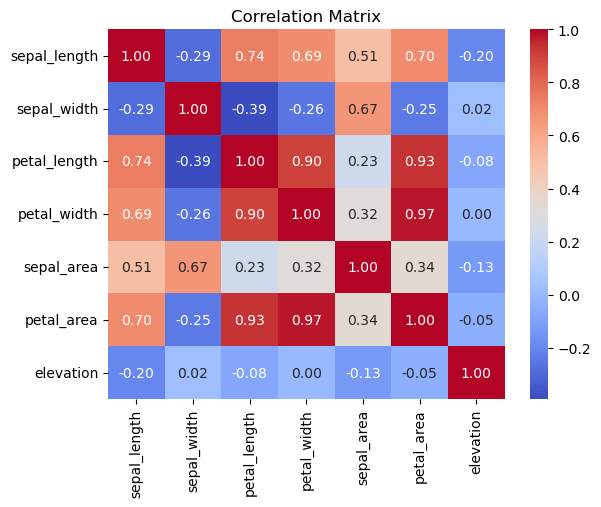

In [47]:
# Task 3 Part 2 - Linear Model Assumptions:
#Linearity: A linear relationship exists between predictors and the response variable.
#Assumption has not been met
for column in ['sepal_length', 'sepal_width', 'petal_width', 'sepal_area', 'petal_area', 'elevation']:
    sns.scatterplot(data=df, x=column, y='petal_length')
    plt.xlabel(column)
    plt.ylabel('Petal Length')
    plt.show()

#Independence: Residuals (errors) should be independent of each other.
#Assumption has not been met; The DW test suggest some positive autocorrelation &
# the resid vs predicted does not show random scatter
dw_test_stat = durbin_watson(model.resid)
print(f'Durbin-Watson test statistic: {dw_test_stat}')
# Values close to 2.0 suggest independence of residuals.

import statsmodels.api as sm
import matplotlib.pyplot as plt


# Homoscedasticity: Residuals show constant variance against predicted values.
# The resid vs predicted does not show constant variance. Assumption not met
predicted_values = model.predict(X)
plt.scatter(predicted_values, model.resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Petal Length')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


#Normality: Residuals should have an approximate normal distribution.
#Normality Assumption has been met
shapiro_results = stats.shapiro(model.resid)
print(f'Shapiro-Wilk test results: {shapiro_results}')

sm.qqplot(model.resid, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


#No Multicollinearity: Predictors should not be highly correlated.
#highly correlated predictor variables exist

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_independent_variables = X.drop('const', axis=1)  # Exclude the constant term
vif_data = pd.DataFrame()
vif_data['feature'] = X_independent_variables.columns
vif_data['VIF'] = [variance_inflation_factor(X_independent_variables.values, i) for i in range(X_independent_variables.shape[1])]
print(vif_data)

import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix
corr = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'elevation']].corr()

# heatmap of the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()



#Additivity:


In [ ]:
_='''
# Task 3 Conclusion (Limitations & Solutions):

For the ANOVA, the Shapiro-Wilk and Levene's tests indicated violations of the normality and homogeneity of 
variance assumptions, respectively.

In the linear regression, the data suggested non-linearity, dependent residuals (per the Durbin-Watson statistic), 
heteroscedasticity, and multicollinearity concerns.

Violations of ANOVA and linear regression assumptions can lead to unreliable and biased results, 
undermining the validity of conclusions. For example, non-normality and heteroscedasticity can distort 
significance tests and future confidence intervals, while multicollinearity can inflate variance, compromising 
the stability and interpretability of our regression coefficients. These issues require corrective measures
to ensure the reliability of analytical conclusions.

To address these, we can switch to non-parametric tests like Kruskal-Wallis for ANOVA issues, and apply 
transformations for linear regression concerns. Additionally, employing methods like ridge regression and 
stepwise variable selection can mitigate multicollinearity. 
These techniques are readily usable in Python, offering ways to strengthen the validity of our findings.
'''

In [ ]:
'''
# Task 4 - Comprehensive Summary

# Problem Description and Research Question:
The research focuses on a detailed examination of the Iris flower dataset, The primary question is to 
identify whether the petal length among different Iris species exhibits a significant difference and 
how it is affected by various characteristics and environmental variables.

# Data Analysis:
ANOVA was employed to investigate the differences in petal length among Iris species. 
The results were definitive with a p-value of 0.00, indicating a statistically significant difference in 
petal length across the species. Hence, we rejected the null hypothesis, confirming that not all Iris species 
share the same mean petal length.

A linear regression model assessed the relationship between petal length and other variables, 
including sepal length, sepal width, petal width, sepal area, petal area, and elevation. 
The model accounted for 90.6% of the variability in petal length (R-squared = 0.906), signifying a strong 
predictive power. Significant predictors included sepal length and petal area, while elevation did not show 
a significant effect. # Note: There is a Multicollinearity issue.

# Limitations and Assumptions:
While the ANOVA and linear regression models are strong analytical tools, our analysis faced several challenges:

The assumption of normality was questioned in the ANOVA, with the Shapiro-Wilk test indicating a 
deviation from normality. This could affect the validity of the ANOVA results.

Levene's test signaled a violation of the homogeneity of variances assumption in ANOVA, which might distort the 
test statistics and p-values.

The linear model indicated potential issues with multicollinearity among the predictors and heteroscedasticity 
in the residuals, which could bias the standard errors and the inference drawn from the model.

There was evidence of non-linearity and autocorrelation in the residuals, challenging the linearity and 
independence assumptions of the regression model.

# Solutions to Address Limitations:
A Kruskal-Wallis test could be used instead of ANOVA to relax the normality and homogeneity of variances assumptions.
Transformation of the dependent variable or independent variables could address issues of non-linearity and 
heteroscedasticity in the linear model. Ridge regression or variable selection could be employed to deal with 
multicollinearity by imposing a penalty on the size of the coefficients or by removing highly correlated variables.

# Conclusion:
The analyses provide compelling evidence of diversity in petal lengths across Iris species and a strong relationship 
between petal length and certain features. However, the observed violations of statistical assumptions 
necessitate extreme caution. By adopting more suitable statistical techniques and model diagnostics, 
we can ensure the reliability of our conclusions. This study highlights the criticality of 
rigorous data examination and model assumption testing in research.
'''